In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [16]:
df.replace("NA", np.nan, inplace=True)
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [17]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)


Date              0.000000
Location          0.000000
MinTemp           0.332417
MaxTemp           0.218060
Rainfall          0.000000
Evaporation      42.400222
Sunshine         47.451114
WindGustDir       6.508413
WindGustSpeed     6.467216
WindDir9am        6.861429
WindDir3pm        2.606775
WindSpeed9am      0.749359
WindSpeed3pm      1.797751
Humidity9am       1.077514
Humidity3pm       2.486735
Pressure9am       9.761555
Pressure3pm       9.780022
Cloud9am         37.379161
Cloud3pm         39.843167
Temp9am           0.465952
Temp3pm           1.863808
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64


In [18]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.mean()))
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.472516,7.63054,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.472516,7.63054,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.472516,7.63054,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.472516,7.63054,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,No,No


In [25]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [36]:
LOCATION = 'Townsville'
df_filter = df[df['Location'] == LOCATION]
avg = df_filter['Humidity9am'].mean()

print(f"Average humidity at 9am in {LOCATION} is {avg}")

Average humidity at 9am in Townsville is 63.93359762140734


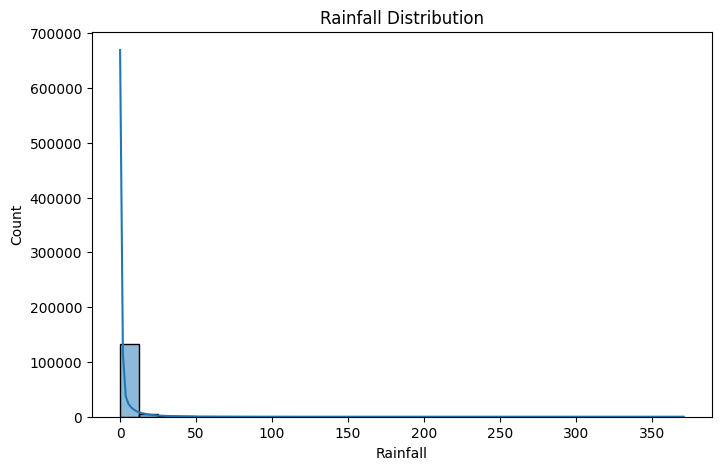

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rainfall'], bins=30, kde=True)
plt.title("Rainfall Distribution")
plt.show()


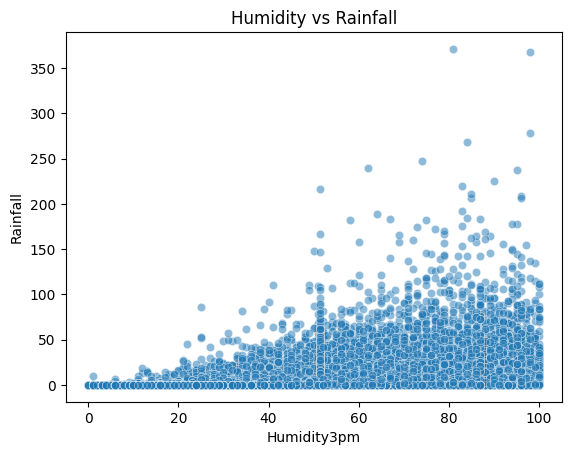

In [37]:
sns.scatterplot(x=df['Humidity3pm'], y=df['Rainfall'], alpha=0.5)
plt.title("Humidity vs Rainfall")
plt.show()